###  Introduction

In this task, we implement and understand **Linear Regression** — one of the most fundamental algorithms in supervised machine learning. The goal is to predict house prices based on various features such as area, number of bedrooms, and bathrooms. We begin with exploratory data analysis (EDA) to understand the data, followed by building a regression model using Scikit-learn. The model's performance is evaluated using metrics like **MAE**, **MSE**, and **R² score**. This task covers both **simple** and **multiple linear regression**, highlighting how additional features improve prediction accuracy.


***Import necessary Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe(include="all")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## Simple Linear Regression: (e.g., Price vs Area)

  Uses **one independent variable** to predict a dependent variable.  
  Example: Predicting house price based only on area.  
  **Equation:**  
  `Price = b₀ + b₁ × Area`

In [18]:
x=df['area']
y=df['price']

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
model=LinearRegression()

In [22]:
model.fit(X_train.values.reshape(-1,1),Y_train)

LinearRegression()

In [23]:
y_predict=model.predict(X_test.values.reshape(-1,1))

Note:
We use .values.reshape(-1, 1) to convert a 1D array into a 2D array because LinearRegression in Scikit-learn expects the input features to be 2D (i.e., shape [n_samples, n_features]).
This is required when using only one feature (Simple Linear Regression).

## Evaluate the Model

In [24]:
mae = mean_absolute_error(Y_test, y_predict)
mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


##Plot Regression Line

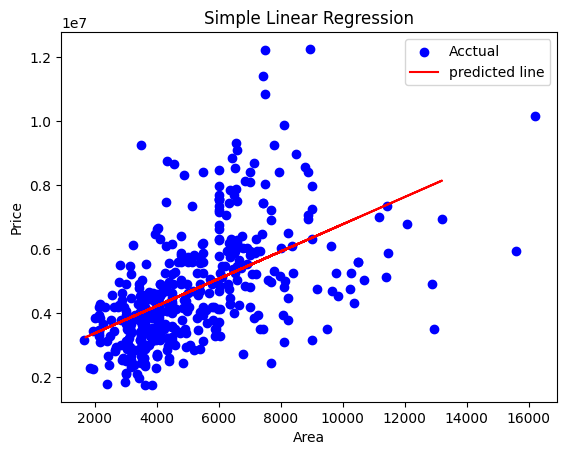

In [25]:
plt.scatter(X_train,Y_train, color='blue',label='Acctual')
plt.plot(X_test,y_predict,color='red',label='predicted line')
plt.title("Simple Linear Regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

 ## Coefficients Interpretation

In [26]:
print("Intercept:", model.intercept_)
print("Slope (Coefficient):", model.coef_[0])


Intercept: 2512254.2639593435
Slope (Coefficient): 425.72984193878284


##  Multiple Linear Regression

Uses **two or more independent variables** to predict the target.  
  Example: Predicting house price using area, bedrooms, and bathrooms.  
  **Equation:**  
  `Price = b₀ + b₁ × Area + b₂ × Bedrooms + b₃ × Bathrooms`

In [35]:
X = df[['area', 'bedrooms', 'bathrooms']]  # More features
Y = df['price']

X_train_, X_test_ , y_train_, y_test_ = train_test_split(X, Y, test_size=0.2, random_state=42)

MSE = LinearRegression()
MSE.fit(X_train_, y_train_)
y_pred = MSE.predict(X_test_)


print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2_score(y_test_, y_pred))




MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.4559299118872445


In [36]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [425.72984194]
Intercept: 2512254.2639593435


In [43]:
print("X_train shape: ",X_train_.shape)
print("y_train shape :",y_train_.shape)

X_train shape:  (436, 3)
y_train shape : (436,)


###  Conclusion
In this task, we successfully implemented both **simple** and **multiple linear regression** models to predict house prices. We started with EDA to understand the dataset, explored relationships between variables, and applied encoding for categorical features. Using Scikit-learn, we built and evaluated our regression model. The results showed that including multiple features (like bedrooms and bathrooms) improved prediction accuracy over using a single feature (like area). Overall, this task helped reinforce key concepts in regression modeling, feature selection, and performance evaluation.
